In [43]:
import numpy as np
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
from sklearn.metrics  import plot_roc_curve


In [6]:
from tensorflow.keras.models import load_model

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU, Dense, Flatten, Dropout, BatchNormalization, InputLayer, Activation


In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

training_generator = train_datagen.flow_from_directory(
    '../input/facemaskdataset/Face Mask Dataset/Train',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)


validation_generator = test_datagen.flow_from_directory(
    "../input/facemaskdataset/Face Mask Dataset/Validation",
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 9999 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (300, 300, 3)),
    Conv2D(16, kernel_size=(3, 3)),
    
    MaxPooling2D((2,2)),
    
    Conv2D(32, kernel_size=(3, 3),),
    MaxPooling2D(),
    Conv2D(64, kernel_size=(3, 3),),
    MaxPooling2D(),
    Conv2D(64, kernel_size=(3, 3),),
    MaxPooling2D(),
    Conv2D(64, kernel_size=(3, 3),),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

2022-05-01 14:43:40.315409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 14:43:40.421131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 14:43:40.421904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 14:43:40.423085: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [11]:
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.CSVLogger("training_log.csv", separator=',', append=False),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1),
]

In [12]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [14]:
history=model.fit(training_generator,validation_data=validation_generator, epochs=50,callbacks=callbacks)

2022-05-01 14:44:03.527777: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-01 14:44:06.366707: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


79/79 [==============================] - 94s 1s/step - loss: 0.2726 - accuracy: 0.9041 - val_loss: 0.0573 - val_accuracy: 0.9812
Epoch 2/50
79/79 [==============================] - 45s 572ms/step - loss: 0.0641 - accuracy: 0.9780 - val_loss: 0.0600 - val_accuracy: 0.9825
Epoch 3/50
79/79 [==============================] - 46s 576ms/step - loss: 0.0415 - accuracy: 0.9843 - val_loss: 0.0254 - val_accuracy: 0.9925
Epoch 4/50
79/79 [==============================] - 45s 569ms/step - loss: 0.0255 - accuracy: 0.9907 - val_loss: 0.0237 - val_accuracy: 0.9900
Epoch 5/50
79/79 [==============================] - 45s 575ms/step - loss: 0.0223 - accuracy: 0.9922 - val_loss: 0.0267 - val_accuracy: 0.9875
Epoch 6/50
79/79 [==============================] - 45s 574ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0186 - val_accuracy: 0.9887
Epoch 7/50
79/79 [==============================] - 46s 576ms/step - loss: 0.0220 - accuracy: 0.9913 - val_loss: 0.0128 - val_accuracy: 0.9950
Epoch 8/50
79

In [31]:
model.save("new.h5")

In [35]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.272573,0.904090,0.057264,0.98125,0.0010
1,0.064056,0.977998,0.060033,0.98250,0.0010
2,0.041494,0.984298,0.025435,0.99250,0.0010
3,0.025473,0.990699,0.023667,0.99000,0.0010
4,0.022326,0.992199,0.026711,0.98750,0.0010
5,0.016438,0.994699,0.018612,0.98875,0.0010
6,0.021966,0.991299,0.012823,0.99500,0.0010
7,0.015760,0.994299,0.010073,0.99625,0.0010
8,0.018242,0.993599,0.031935,0.98750,0.0010
9,0.013600,0.994599,0.009402,0.99625,0.0010


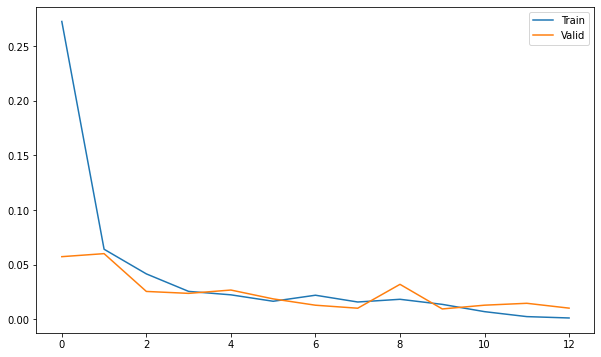

In [38]:
plt.figure(figsize = (10, 6))
plt.plot(range(len(hist_df)), hist_df.loss, label = 'Train')
plt.plot(range(len(hist_df)), hist_df.val_loss, label = 'Valid')
plt.legend()
plt.show()
         

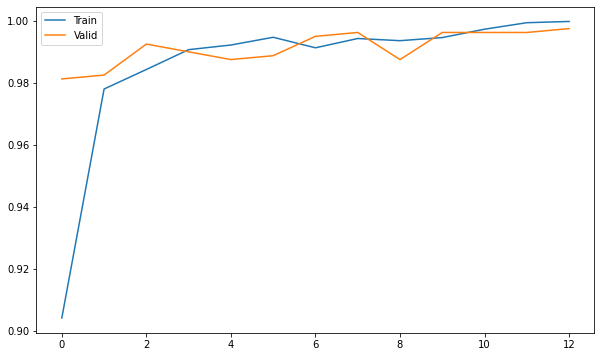

In [39]:
plt.figure(figsize = (10, 6))
plt.plot(range(len(hist_df)), hist_df.accuracy, label = 'Train')
plt.plot(range(len(hist_df)), hist_df.val_accuracy, label = 'Valid')
plt.legend()
plt.show()

In [40]:
testing_generator = test_datagen.flow_from_directory(
    "../input/facemaskdataset/Face Mask Dataset/Test",
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 992 images belonging to 2 classes.


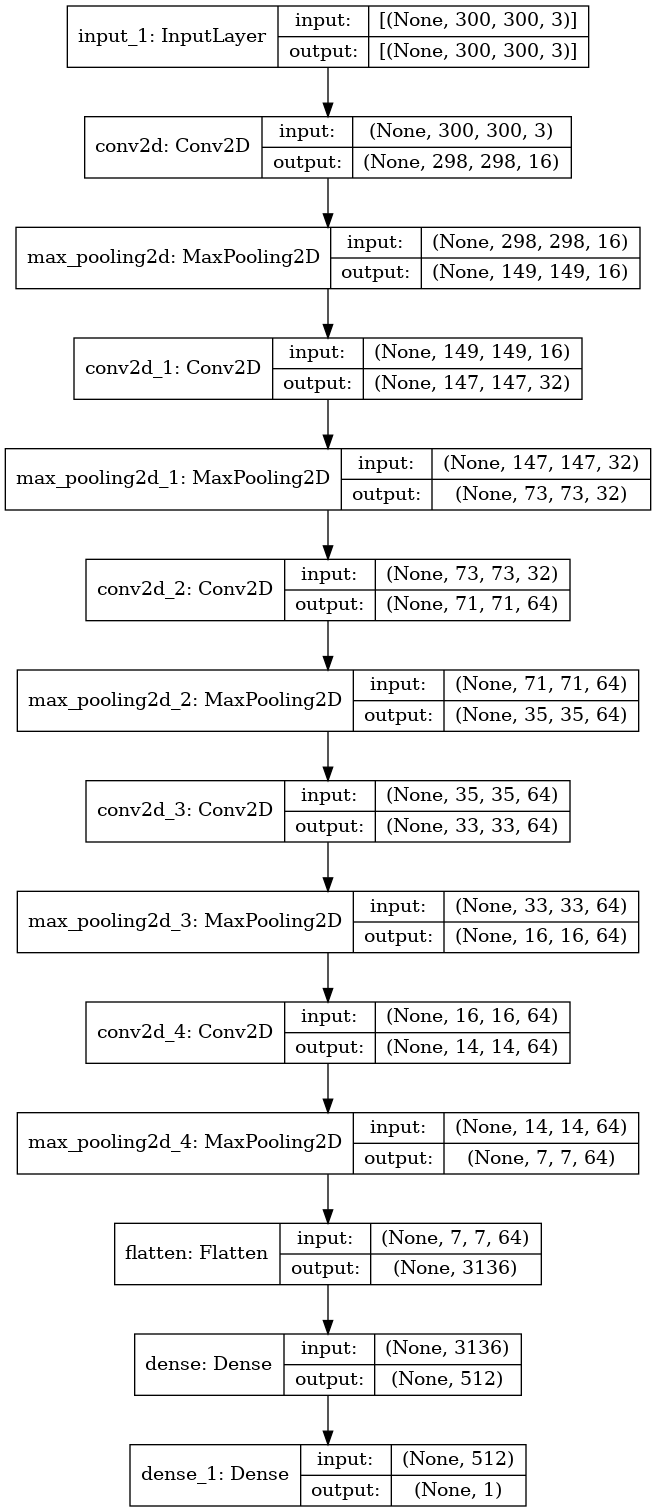

In [104]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [19]:
model.inputs

[<KerasTensor: shape=(None, 300, 300, 3) dtype=float32 (created by layer 'input_1')>]

In [21]:
for i in validation_generator:
    print(model.predict(i[0]),i[1])
    break

[[1.18175536e-09]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00418158e-16]
 [9.99999762e-01]
 [1.00000000e+00]
 [2.01731361e-08]
 [9.99999642e-01]
 [6.07996808e-09]
 [9.99999285e-01]
 [1.00000000e+00]
 [9.99989986e-01]
 [3.56421143e-11]
 [1.00000000e+00]
 [7.27537740e-14]
 [1.93015410e-04]
 [3.58034549e-06]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.42352621e-06]
 [8.59189253e-09]
 [1.32854306e-14]
 [9.99999762e-01]
 [8.40983777e-15]
 [1.00000000e+00]
 [9.99997258e-01]
 [9.97565508e-01]
 [1.00000000e+00]
 [4.85931011e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.70422660e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999881e-01]
 [5.92466211e-18]
 [9.99999881e-01]
 [3.55239194e-13]
 [9.06031164e-06]
 [1.00000000e+00]
 [9.99993086e-01]
 [9.33214724e-19]
 [1.00000000e+00]
 [3.35826138e-27]
 [3.49069538e-04]
 [1.48759192e-13]
 [1.51397312e-08]
 [4.68389298e-05]
 [1.28028706e-01]
 [1.00000000e+00]
 [4.41881391e-04]
 [3.97270253e-25]
 [9.99998927e-01]
 [9.99980807e-01]
 [1.253611

In [22]:
test_generator = test_datagen.flow_from_directory(
    '../input/testing-dataset/TESTING/New folder (2)',
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

Found 5199 images belonging to 2 classes.


In [23]:
model.evaluate(validation_generator)

7/7 [==============================] - 5s 646ms/step - loss: 0.0101 - accuracy: 0.9975


[0.010139862075448036, 0.9975000023841858]

In [24]:
num_files = len(os.listdir("../input/testing-dataset/TESTING/Validation/WithMask"))
index = np.random.randint(0, num_files-1)

[0.]
Mask


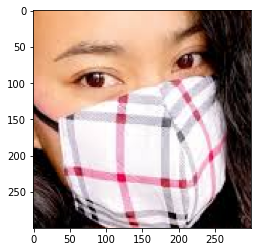

In [78]:
paths = "../input/testing-dataset/TESTING/Validation/WithMask"
c = 0
num_files = len(os.listdir(paths))
index = np.random.randint(0, num_files-1)


for i in os.listdir(paths)[index:index+1]:
    path = paths + '/' +i 
    #img = image.load_img(path, target_size=(300,300))
    img = image.load_img(path, target_size=(300,300))
#     c = c+ 1
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis =0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    print(classes[0])
    
    if classes[0]> 0.5:
        #print(path + ' Without Mask')
        plt.imshow(img)
        print('Without Mask')
    else:
        #print(path + 'Mask')
        print('Mask')
#     print(c)
    plt.imshow(img)
    
    

In [105]:
# 1 = No mask
# 0 = Mask

[1.0625574e-07]
Mask


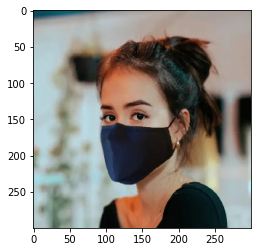

In [27]:
path = "../input/checking/Checking/image_2022-04-30_17-06-35.jpeg"
img = image.load_img(path, target_size=(300,300))
#     c = c+ 1
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])


if classes[0]> 0.5:
    #print(path + ' Without Mask')
    plt.imshow(img)
    print('Without Mask')
else:
    #print(path + 'Mask')
    print('Mask')
#     print(c)
plt.imshow(img)



[2.592969e-17]
Mask


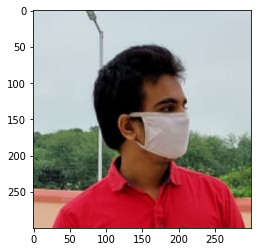

In [28]:
path = "../input/checking/Checking/photo_2022-04-30_17-18-11.jpg"
img = image.load_img(path, target_size=(300,300))
#     c = c+ 1
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])


if classes[0]> 0.5:
    #print(path + ' Without Mask')
    plt.imshow(img)
    print('Without Mask')
else:
    #print(path + 'Mask')
    print('Mask')
#     print(c)
plt.imshow(img)




[1.]
Without Mask


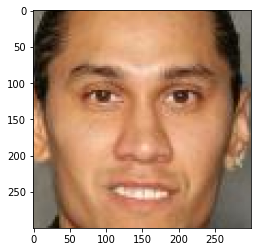

In [30]:
path = "../input/testing-dataset/TESTING/New folder (2)/Without Mask/Male/103.png"
img = image.load_img(path, target_size=(300,300))
#     c = c+ 1
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])


if classes[0]> 0.5:
    #print(path + ' Without Mask')
    plt.imshow(img)
    print('Without Mask')
else:
    #print(path + 'Mask')
    print('Mask')
#     print(c)
plt.imshow(img)




[1.6667422e-06]
Mask


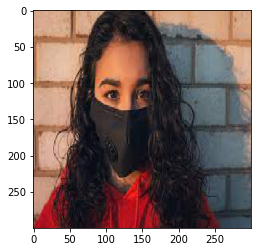

In [79]:
path = "../input/random/download (2).jpg"
img = image.load_img(path, target_size=(300,300))
#     c = c+ 1
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])


if classes[0]> 0.5:
    #print(path + ' Without Mask')
    plt.imshow(img)
    print('Without Mask')
else:
    #print(path + 'Mask')
    print('Mask')
#     print(c)
plt.imshow(img)




[1.]
Without Mask


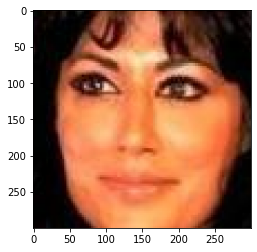

In [96]:
path = "../input/testing-dataset/TESTING/Validation/WithoutMask/1172.png"
img = image.load_img(path, target_size=(300,300))
#     c = c+ 1
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)
#x = x/255
images = np.vstack([x])
classes = model.predict(images)
print(classes[0])


if classes[0]> 0.5:
    #print(path + ' Without Mask')
    plt.imshow(img)
    print('Without Mask')
else:
    #print(path + 'Mask')
    print('Mask')
#     print(c)
plt.imshow(img)

[1.]
Without Mask


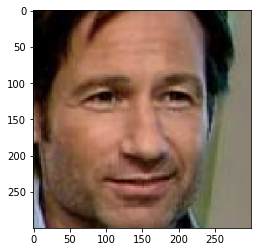

In [103]:
path = "../input/testing-dataset/TESTING/Validation/WithoutMask/1758.png"
img = image.load_img(path, target_size=(300,300))
#     c = c+ 1
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)
#x = x/255
images = np.vstack([x])
classes = model.predict(images)
print(classes[0])


if classes[0]> 0.5:
    #print(path + ' Without Mask')
    plt.imshow(img)
    print('Without Mask')
else:
    #print(path + 'Mask')
    print('Mask')
#     print(c)
plt.imshow(img)
